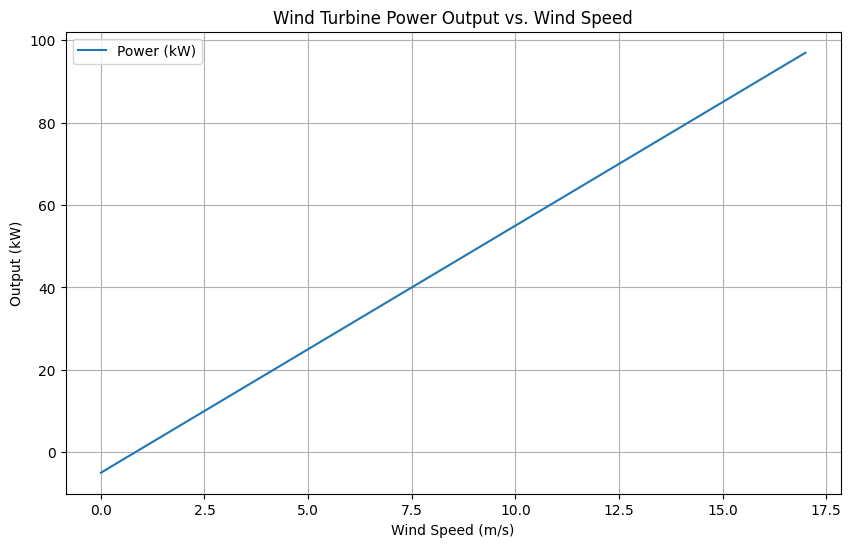

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def wind_turbine_power_curve(wind_speed, a, b, c, d):
    """
    Wind turbine power curve model.
    
    :param wind_speed: The wind speed (m/s).
    :param a: The cubic term coefficient.
    :param b: The quadratic term coefficient.
    :param c: The linear term coefficient.
    :param d: The constant term.
    :return: The power output (kW).
    """
    return a * wind_speed**3 + b * wind_speed**2 + c * wind_speed + d

# Define the wind speed range based on the graph.
wind_speeds = np.linspace(0, 17, 100)

# Guess the coefficients. These will need to be adjusted to match the curve.
# These are just starting values and will need to be fine-tuned.
a = 0
b = 0
c = 6
d = -5

# Calculate the power output.
power_output = wind_turbine_power_curve(wind_speeds, a, b, c, d)

# Plot the curve.
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_output, label='Power (kW)')
plt.title('Wind Turbine Power Output vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Output (kW)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\npace\AppData\Local\Temp\ipykernel_39084\3775769160.py:7: RuntimeWarning: invalid value encountered in log
  return a + b * np.log(c * x + d)


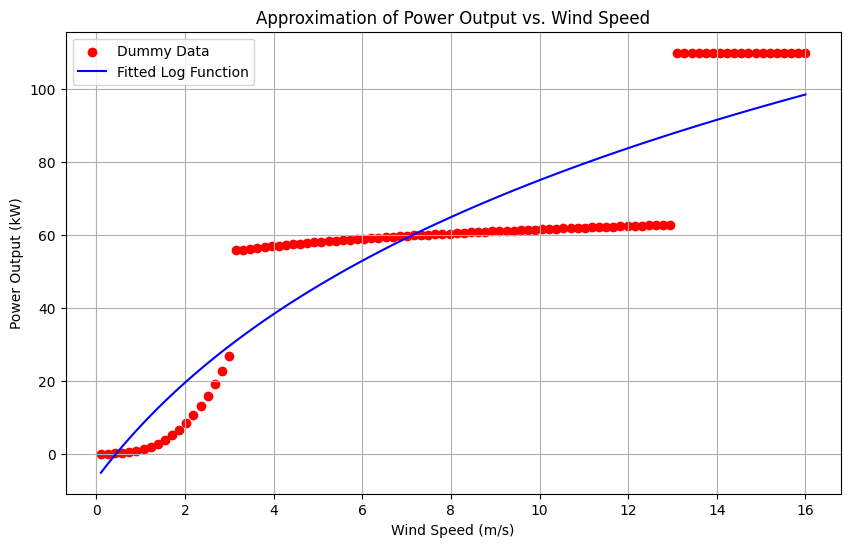

array([-77.44523369,  66.27147546,   0.70798094,   2.90139617])

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming a general form of the log function to fit the curve
def log_function(x, a, b, c, d):
    return a + b * np.log(c * x + d)

# Generate some dummy data points based on the shape of the curve from the image
# Since we don't have the actual data, this is a rough estimation
x_dummy = np.linspace(0.1, 16, 100)  # wind speed from 0.1 to avoid log(0) which is undefined
y_dummy = np.piecewise(x_dummy, [x_dummy < 3, (x_dummy >= 3) & (x_dummy <= 13), x_dummy > 13],
                       [lambda x: x**3, lambda x: 50 + 5 * np.log(x), lambda x: 110])

# Use curve_fit to find the best fit parameters for the log function
# p0 is the initial guess for the parameters
p0 = [1, 1, 1, 1]
params, covariance = curve_fit(log_function, x_dummy, y_dummy, p0=p0)

# Plot the dummy data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_dummy, y_dummy, label='Dummy Data', color='red')
plt.plot(x_dummy, log_function(x_dummy, *params), label='Fitted Log Function', color='blue')

plt.title('Approximation of Power Output vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (kW)')
plt.legend()
plt.grid(True)
plt.show()

params


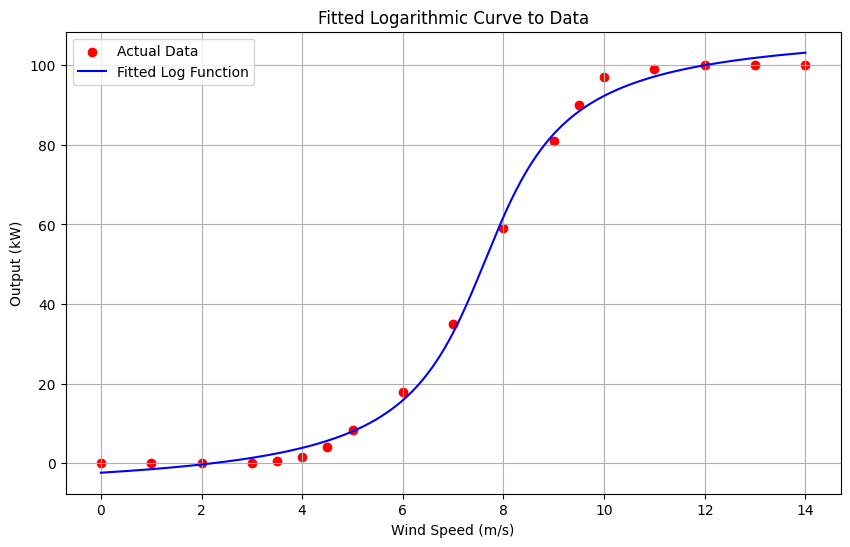

[50.97364546 37.75147394  0.81999185 -6.26153271]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the logarithmic function
def log_function(x, a, b, c, d):
    return a + b * np.log(c * x + d)

# Define the arctan function for curve fitting with asymptotes
def arctan_function(x, A, B, C, D):
    return A + (B / np.pi) * np.arctan(C * x + D)

# Updated example data points
y_data = np.array([0, 0, 0, 0, 0.5, 1.5, 4, 8.5, 18, 35, 59, 81, 90, 97, 99, 100, 100, 100])
x_data = np.array([0, 1, 2, 3,3.5, 4, 4.5, 5, 6, 7, 8, 9, 9.5, 10, 11, 12, 13, 14])

# Use curve_fit to find the best fit parameters for the log function
initial_guess = [1, 1, 1, 1]
params, covariance = curve_fit(arctan_function, x_data, y_data, p0=initial_guess)

# Create a range of x values for plotting the fitted curve
x_values = np.linspace(min(x_data), max(x_data), 1000)
y_values = arctan_function(x_values, *params)

# Plot the actual data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Actual Data')
plt.plot(x_values, y_values, label='Fitted Log Function', color='blue')
plt.title('Fitted Logarithmic Curve to Data')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Output (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Output the parameters for the log function
print(params)
